In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.theta_one= None
        self.theta_not = None

    def fit(self, X, y, num_iterations=1000, learning_rate=0.01):
        if (num_iterations != 1000):
            self.num_iterations = num_iterations
        if (learning_rate != 0.01):
            self.learning_rate = learning_rate
        
        self.theta_one = np.random.random()
        self.theta_not = np.random.random()
        n_samples = len(X)

        for _ in range(self.num_iterations):
            hypothesis = self.theta_not + np.dot(X, self.theta_one)
            gradients = np.dot(X.T, (hypothesis - y)) / n_samples
            self.theta_not -= self.learning_rate * np.mean((hypothesis - y))
            self.theta_one -= self.learning_rate * gradients

    def predict(self, X):
        return self.theta_one + np.dot(X, self.theta_not)

In [3]:
np.random.seed(4192)
X = np.random.rand(100, 1)
y = 2 * X + 1 + np.random.rand(100, 1)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)

lr = LinearRegression()
lr.fit(X_train, y_train, num_iterations=3000, learning_rate=0.01)



In [5]:
y_pred = lr.predict(X_test)

In [6]:
mse = np.mean((y_test - y_pred) ** 2)
tse = np.sum(np.sum((np.mean(y_test) - y_test) ** 2))
r2 = 1 - (mse / tse)

print(f"MSE:\t {mse}")
print(f"R2 : \t{r2}")



MSE:	 0.10730827385058536
R2 : 	0.9895834374377146


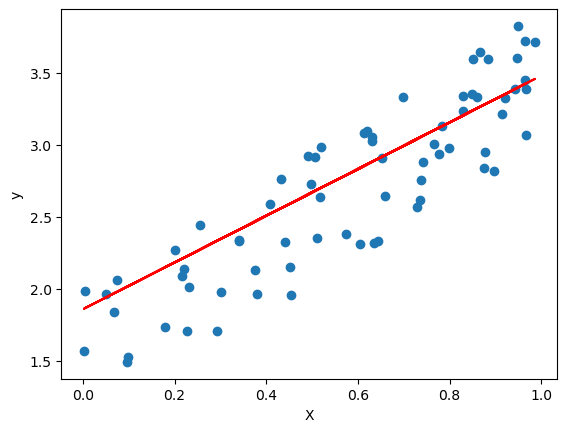

In [7]:
plt.scatter(X_train, y_train)
plt.plot(X_train, lr.theta_one + np.dot(X_train, lr.theta_not), color='r')
plt.xlabel('X')
plt.ylabel('y')
plt.show()